## Generating a dataset

Purpose: We want to assess the correlation of structure (e.g. lipophilicity) of some molecules with their inhibitory activity for Acetylcholinesterase (AChE). First of all:

Import dependencies and load the two datasets for activities (ChEMBL) and molecular descriptors (PubChem).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both datasets
act = pd.read_csv("ache_activities.csv")
desc = pd.read_csv("ache_pubchem_descriptors.csv")

# Keep only relevant columns from ChEMBL
act = act[["canonical_smiles", "pchembl_value", "standard_relation", "standard_type"]]

# Aggregate (some SMILES might appear multiple times → average or median)
act = act.groupby("canonical_smiles", as_index=False)["pchembl_value"].median()



Inspect the two datasets.

In [2]:
act.head()

,canonical_smiles,pchembl_value
0,Br.CC[N+](CC)(CCCCCn1c(=O)cc(C)n(CCCCCn2c(C)cc...,9.40
1,Br.CC[N+](CC)(CCCCCn1c(=O)cc(C)n(CCCCn2c(C)cc(...,9.22
2,Br.CC[N+](CC)(CCCCCn1c(=O)cc(C)n(CCCn2c(C)cc(=...,8.15
3,Br.COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(...,5.50
4,Brc1ccc(-[n+]2ccc3ccccc3c2)cc1.[Br-],5.62


Combine the two datasets.

In [ ]:
# Merge on canonical_smiles, how="inner" drops all rows which are only contained in one df
merged = pd.merge(act, desc, on="canonical_smiles", how="inner") 

print(f"Merged dataset: {len(merged)} entries")
merged.head()


Merged dataset: 200 entries


,canonical_smiles,pchembl_value,CID,MolecularWeight,XLogP,TPSA,HBondDonorCount,HBondAcceptorCount,RotatableBondCount
0,C#CCCOC[n+]1ccc(/C=N/O)cc1.[Cl-],4.01,135909812,240.68,NaN,45.7,1,4.0,5
1,C(=C/C1CCN(Cc2ccccc2)CC1)\c1noc2ccccc12,6.68,9901561,318.40,4.5,29.3,0,3.0,4
2,C/C=C1\[C@H]2C=C(C)C[C@]1(NC1OCC3=C4CC(C)(C)C[...,6.96,118715261,492.60,1.2,90.8,4,5.0,2
3,C/C=C1\[C@H]2C=C(C)C[C@]1(N[C@H]1OC(=O)C3=C4CC...,5.66,118715260,506.60,1.5,108.0,4,6.0,2
4,C=CC(=O)N1C/C(=C\c2ccc(C)cc2)C(=O)/C(=C/c2ccc(...,4.74,24796898,357.40,4.4,37.4,0,2.0,3


Now, inspect the combined dataframe. Look for abnomalies, i.e. duplicates and missing data.

In [6]:
merged.describe()
merged[merged.duplicated(keep=False)]

,canonical_smiles,pchembl_value,CID,MolecularWeight,XLogP,TPSA,HBondDonorCount,HBondAcceptorCount,RotatableBondCount
63,CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccccc1)CCCCCC3,4.770,76318775,389.50,5.3,78.1,1,5.0,4
64,CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccccc1)CCCCCC3,4.770,76318775,389.50,5.3,78.1,1,5.0,4
71,CC[N+](CC)(CC)CCOc1ccc(C(=O)NCCCCCC(=O)NNc2c3c...,8.120,23657682,691.10,NaN,92.4,4,6.0,16
72,CC[N+](CC)(CC)CCOc1ccc(C(=O)NCCCCCC(=O)NNc2c3c...,8.120,23657682,691.10,NaN,92.4,4,6.0,16
93,CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4ccccc4oc3...,9.520,10765787,446.50,4.4,77.1,1,6.0,9
94,CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4ccccc4oc3...,9.520,10765787,446.50,4.4,77.1,1,6.0,9
108,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,7.750,3152,379.50,4.3,38.8,0,4.0,6
109,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,7.750,3152,379.50,4.3,38.8,0,4.0,6
110,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,7.750,3152,379.50,4.3,38.8,0,4.0,6
111,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,7.750,3152,379.50,4.3,38.8,0,4.0,6


Decide what to do with the bad data points and proceed. Make sure to document properly and preserve the original dataframe.

In [ ]:
# dropped incidentally created duplicates
df_clean = merged.drop_duplicates()
df_clean.duplicated().sum()

np.int64(0)

Run a quick EDA on the cleaned dataset including some plots. What can you conclude?

In [11]:
# drop rows with na in column xlogp
df_clean = df_clean.dropna(subset=["XLogP"])
df_clean.isna().sum()


canonical_smiles      0
pchembl_value         0
CID                   0
MolecularWeight       2
XLogP                 0
TPSA                  2
HBondDonorCount       0
HBondAcceptorCount    1
RotatableBondCount    0
dtype: int64

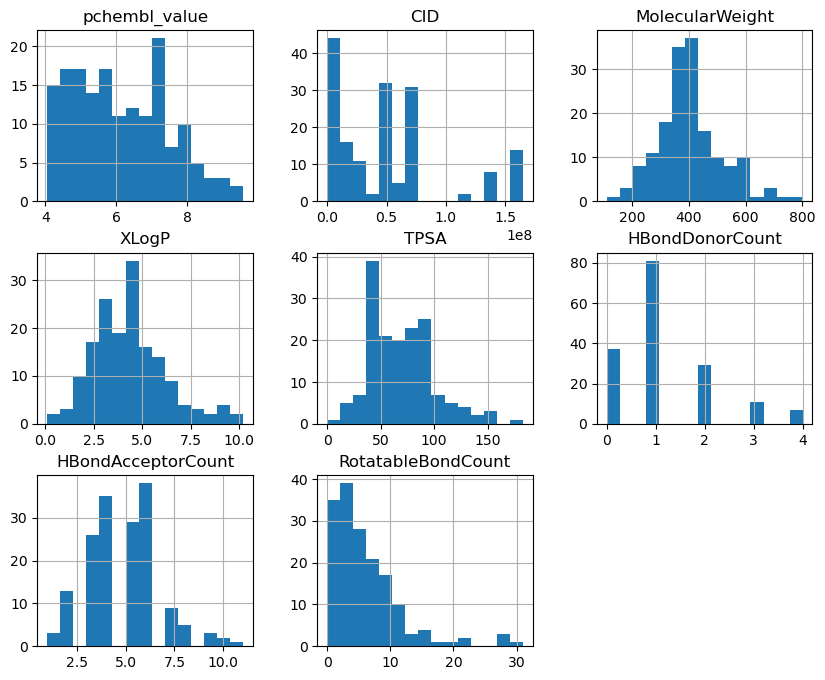

In [ ]:
df_clean.hist(figsize = (10,8), bins = 15);
plt.show()

Export the cleaned dataset as "ache_qsar_data.csv".

In [15]:
df_clean.to_csv("ache_qsar_data.csv")